## A short Pandas guide

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pandas is a Python package that makes it very easy to work with data, which are stored either in a 'series' (univariate data) or 'dataframe' format (multivariate data). A dataframe in practice is a concatenation of series. Each object of this type comes with many methods attached, which makes it very easy to do data-analysis as the calls to these methods can be chained (the calls are read left-to-right).

We will in this short notebook introduce some useful Pandas features that can be helpful for the pairs-trading problem.

To begin we generate some random stock returns using numpy (a numerical mathematics package), and create a DataFrame object out of it. We then use the .plot() method to generate a visualisation.

In [13]:
df = pd.DataFrame(np.random.normal(size=(1000, 2), loc=0.0002, scale=0.02), columns={"Stock_1", "Stock_2"})

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

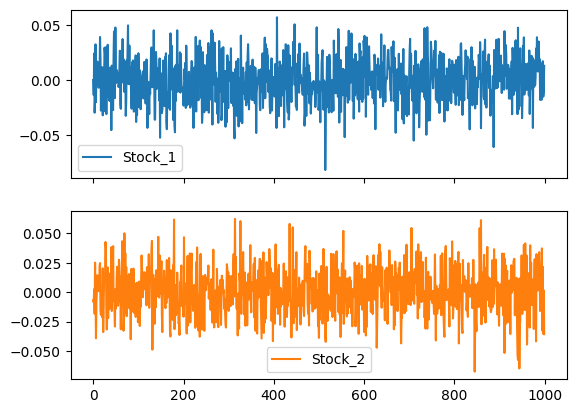

In [14]:
df.plot(subplots=True)

It is easy to just work on a single series by using column indexing:

In [43]:
df["Stock_1"]

0      0.000076
1     -0.013591
2      0.024307
3     -0.029603
4     -0.017619
         ...   
995   -0.012182
996    0.017236
997   -0.015044
998   -0.010745
999    0.013029
Name: Stock_1, Length: 1000, dtype: float64

To better understand the data, it is maybe useful to see the price series derived from the returns by calculating the cumulative product of the returns. This can be done manipulating the pandas objects as vectors of numbers directly, and this should highlight the rich semantic structure of Pandas:

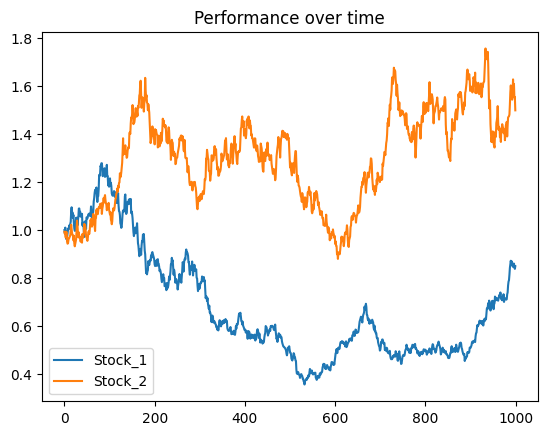

In [35]:
(1+df).cumprod().plot(title="Performance over time")
plt.legend()

It is also straightforward to produce summary statistics from the data frame using the .describe method. 

We can also directly calculate quantities of interest using for example the .mean method. Note how the calls automatically broadcast across the columns; if we instead want across rows we can specify the parameter 'axis=1'. We can use this, for example, to see the performance of a long-short portfolio of the two stocks (assuming daily, costless rebalancing). 

In [22]:
df.describe()

,Stock_1,Stock_2
count,1000.000000,1000.000000
mean,0.000047,0.000599
std,0.020484,0.019722
min,-0.081829,-0.067465
25%,-0.013617,-0.011901
50%,0.000331,0.000264
75%,0.014086,0.013469
max,0.057163,0.062228


In [24]:
df.mean()

Stock_1    0.000047
Stock_2    0.000599
dtype: float64

<AxesSubplot:title={'center':'Portfolio'}>

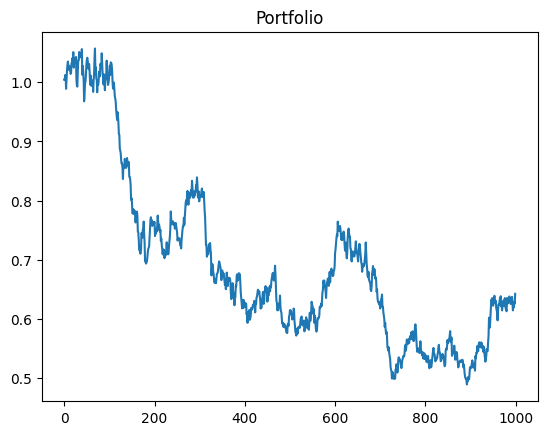

In [50]:
df["Portfolio_Return"] = df["Stock_1"] * 0.4 + df["Stock_2"] * -0.6
(1+df["Portfolio_Return"]).cumprod().plot(title="Portfolio")

See also how the dataframe now has 3 columns - be careful when calculating statistics moving forward!

In [54]:
df

,Stock_1,Stock_2,Portfolio_Return
0,0.000076,-0.006927,0.004187
1,-0.013591,-0.008613,-0.000269
2,0.024307,0.002557,0.008189
3,-0.029603,-0.018258,-0.000886
4,-0.017619,0.025105,-0.022111
...,...,...,...
995,-0.012182,-0.032615,0.014696
996,0.017236,0.021545,-0.006033
997,-0.015044,-0.035368,0.015203
998,-0.010745,0.001583,-0.005247


For our purposes, a useful method is .rolling, which can be chained to calculate rolling statistics. For example, we could look at how the standard deviation changes over time:

<AxesSubplot:>

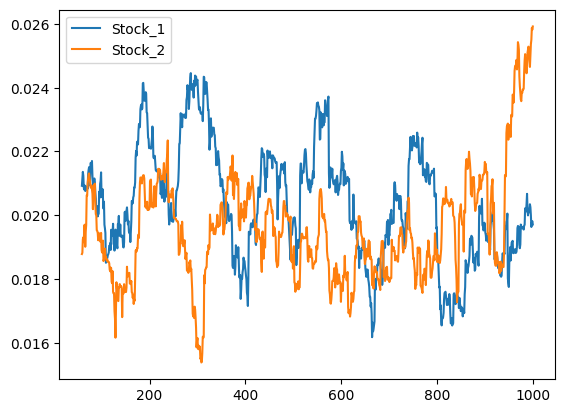

In [45]:
rm = df.rolling(60).std()
rm.plot()

Often more recent data is more relevant, and it possibly to directly calculate exponentially moving averages using .ewm:

<AxesSubplot:>

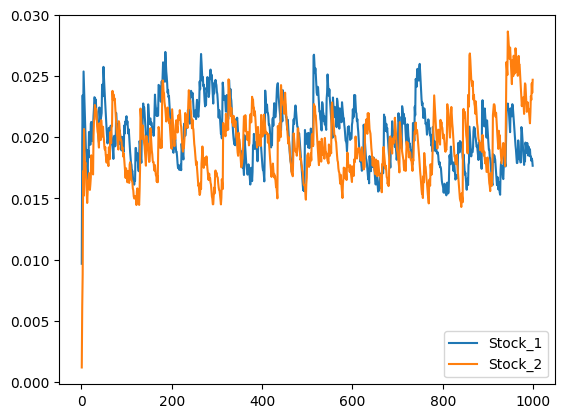

In [47]:
rm = df.ewm(15).std()
rm.plot()

Finally, it is possibly to run arbitrarily complex functions on the data by utilizing pre-defined functions via the .apply method. We will just create a simple function that calculates the squared difference between the max and the minimum of a series. Note that there are many missing values (as there isn't enough data before 30 rows have passed). We can fill these rows with zeros using the fillna method.

In [87]:
def square_box(x):
    return (x.max() - x.min())**2

In [88]:
df.rolling(30).apply(square_box)

,Stock_1,Stock_2,Portfolio_Return
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
995,0.006808,0.006661,0.004021
996,0.006808,0.006661,0.004021
997,0.006808,0.006661,0.004021
998,0.006808,0.006242,0.003085


,Stock_1,Stock_2,Portfolio_Return
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
995,0.006808,0.006661,0.004021
996,0.006808,0.006661,0.004021
997,0.006808,0.006661,0.004021
998,0.006808,0.006242,0.003085


<AxesSubplot:>

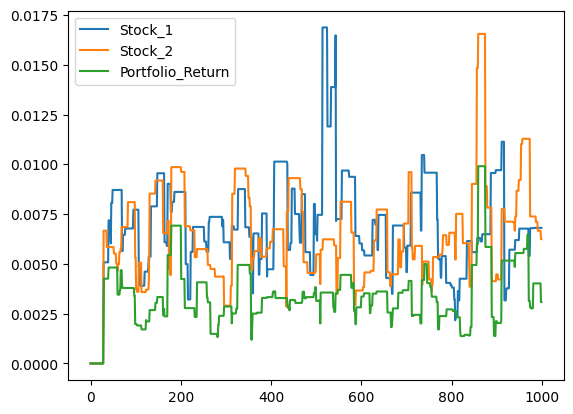

In [90]:
display(df.rolling(30).apply(square_box).fillna(0.0))
df.rolling(30).apply(square_box).fillna(0.0).plot()